# Learning Vector Quantization (LVQ) 学习向量量化
学习向量量化(Learning Vector Quantization,简称LVQ)属于原型聚类，即试图找到一组原型向量来聚类，每个原型向量代表一个簇，将空间划分为若干个簇，从而对于任意的样本，可以将它划入到它距离最近的簇中，不同的是LVQ假设数据样本带有类别标记，因此可以利用这些类别标记来辅助聚类。
算法步骤:P205

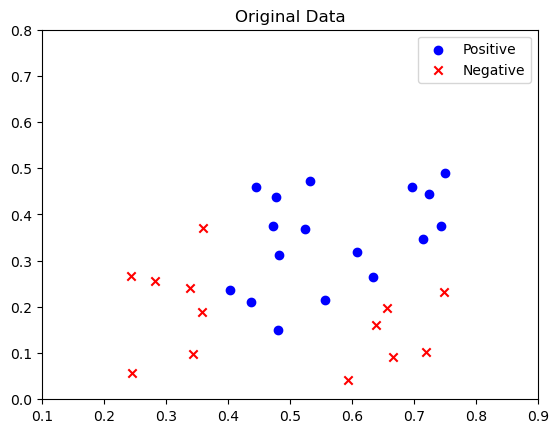

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('wm4.csv', 'r') as file_object:
    X = pd.read_csv(file_object, header=None).values
    
m,d = X.shape  # 样本个数与样本维数
Y = np.ones(m)
Y[8:20] = 0

X_pos = np.concatenate((X[0:8,:], X[21:30,:]), axis=0)
X_neg = X[8:21,:]
plt.scatter(X_pos[:,0], X_pos[:,1], color='blue', marker='o', label='Positive')
plt.scatter(X_neg[:,0], X_neg[:,1], color='red', marker='x', label='Negative')

#plt.axis('square')
plt.legend(loc='upper right')
plt.title('Original Data')
plt.axis([0.1, 0.9, 0, 0.8])
plt.show()

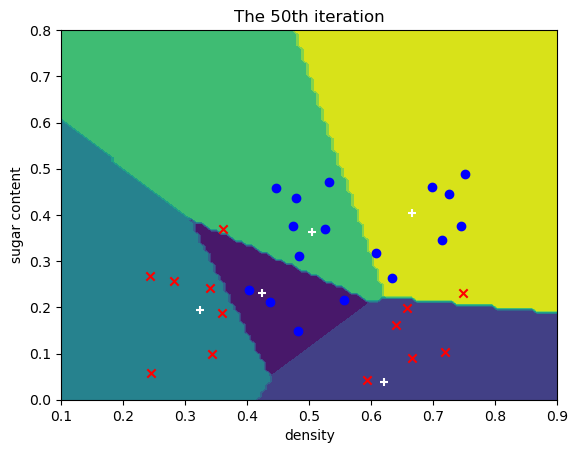

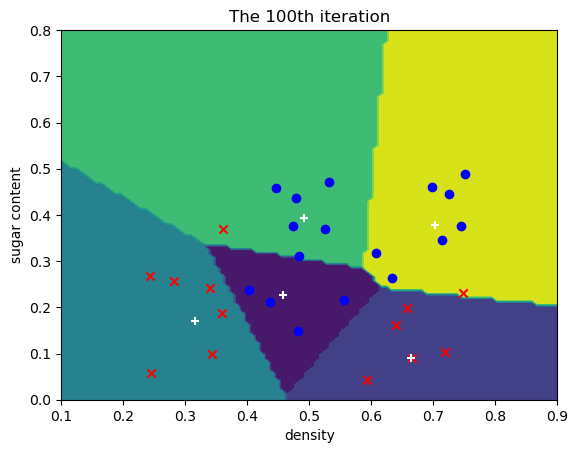

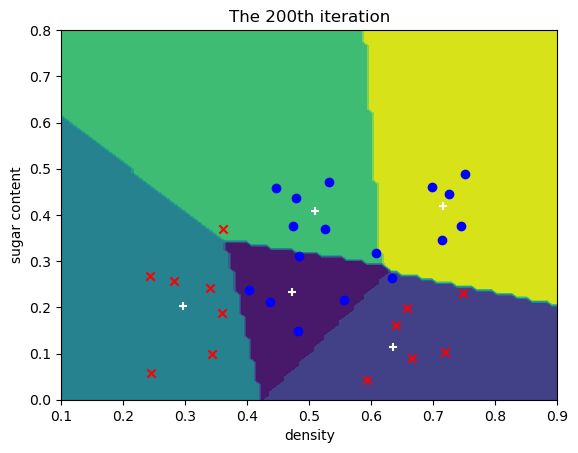

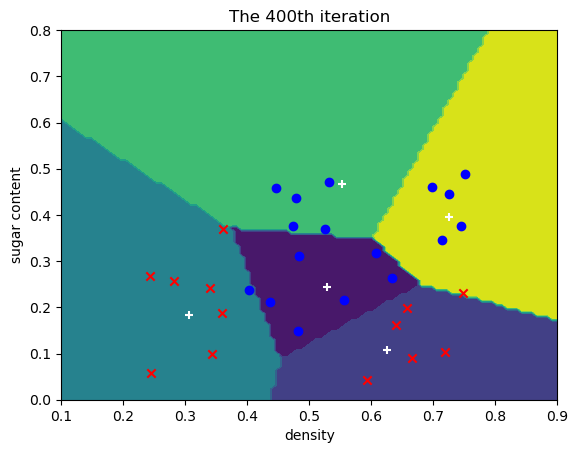

In [97]:
class LVQ():
    def __init__(self, num_prototype_vector, learning_rate, preset_category_tags, X, Y, max_iter=500):
        self.q = num_prototype_vector  # 原型向量个数
        self.eta = learning_rate
        self.epochs = max_iter
        self.t = preset_category_tags  # 预设类别标记
        self.X = X
        self.Y = Y
        self.m = X.shape[0]
        self.p = np.zeros((self.q, X.shape[1]))  # 原型向量
        self.prototype_vector_init()
        
    def prototype_vector_init(self):
        index = np.arange(self.m)
        np.random.shuffle(index)
        shuffleX = self.X[index,:]
        shuffleY = self.Y[index]
        for i in range(self.q):
            for j in range(shuffleX.shape[0]):
                if shuffleY[j] == self.t[i]:  # 从类别标记为tq的样本中随机选取一个作为原型向量
                    self.p[i,:] = shuffleX[j,:]
                    shuffleX = np.delete(shuffleX, j, 0)
                    shuffleY = np.delete(shuffleY, j)
                    break
                    
    def train(self):
        n = 100
        plot_x = np.linspace(0.1, 0.9, n)
        plot_y = np.linspace(0, 0.8, n)
        plot_X, plot_Y = np.meshgrid(plot_x, plot_y)
        plot_Z = np.zeros((n,n))

        for i in range(self.epochs):
            k = np.random.randint(0,self.m)
            dist = np.zeros(self.q)
            for j in range(self.q):
                dist[j] = (self.X[k,:] - self.p[j,:]) @ (self.X[k,:] - self.p[j,:])  # .T
            minj = np.argmin(dist)
            if self.Y[k] == self.t[minj]:
                self.p[minj,:] += self.eta * (self.X[k] - self.p[minj,:])  # 靠拢
            else:
                self.p[minj,:] -= self.eta * (self.X[k] - self.p[minj,:])  # 远离
                
            if i in [50,100,200,400]:
                for mm in range(n):
                    for nn in range(n):
                        x = np.array([plot_x[mm], plot_y[nn]])
                        plot_Z[nn, mm] = self.predict(x)

                plt.contourf(plot_X, plot_Y, plot_Z)
                plt.scatter(X_pos[:,0], X_pos[:,1], color='blue', marker='o')
                plt.scatter(X_neg[:,0], X_neg[:,1], color='red', marker='x')
                plt.scatter(self.p[:,0],self.p[:,1], color='w', marker='+')
                plt.axis([0.1, 0.9, 0, 0.8])
                plt.xlabel("density")
                plt.ylabel("sugar content")
                plt.title(f"The {i}th iteration")
                plt.show()
    
    def predict(self, x):
        dist = np.zeros(self.q)
        for i in range(self.q):
            dist[i] = (x - self.p[i,:]) @ (x - self.p[i,:])

        return np.argmin(dist) + 1

np.random.seed(3)
a = LVQ(5, 0.1, [1,0,0,1,1], X, Y)
a.train()